In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import ee
import geemap

In [3]:
ee.Initialize()

In [4]:
Map = geemap.Map()

In [5]:
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

#  Importar datos

In [6]:
ERA5 = ee.ImageCollection("ECMWF/ERA5/DAILY") 
#https://developers.google.com/earth-engine/datasets/catalog/ECMWF_ERA5_DAILY#description

In [7]:
LimitesAdm = ee.FeatureCollection("FAO/GAUL_SIMPLIFIED_500m/2015/level1")
#https://developers.google.com/earth-engine/datasets/catalog/FAO_GAUL_SIMPLIFIED_500m_2015_level1?hl=en

# Definir área de interés y banda de interés

In [8]:
aoi = LimitesAdm.filter(ee.Filter.eq("ADM1_NAME", "Valle Del Cauca"))

In [9]:
aoi.geometry()

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Collection.geometry",
    "arguments": {
      "collection": {
        "functionInvocationValue": {
          "functionName": "Collection.filter",
          "arguments": {
            "collection": {
              "functionInvocationValue": {
                "functionName": "Collection.loadTable",
                "arguments": {
                  "tableId": {
                    "constantValue": "FAO/GAUL_SIMPLIFIED_500m/2015/level1"
                  }
                }
              }
            },
            "filter": {
              "functionInvocationValue": {
                "functionName": "Filter.equals",
                "arguments": {
                  "leftField": {
                    "constantValue": "ADM1_NAME"
                  },
                  "rightValue": {
                    "constantValue": "Valle Del Cauca"
                  }
                }
              }
            }
          }
        }
      }
    }
  }
})

In [10]:
FechaI = "1980-01-01"
FechaF = "1989-12-31"

In [11]:
tempMedia = ERA5.filterBounds(aoi).filterDate(FechaI,FechaF).select("mean_2m_air_temperature")

# Recortar imagenes al aoi

In [12]:
def Recortar(img):
    return img.clip(aoi)

In [13]:
tempMedia = tempMedia.map(Recortar)

In [14]:
Map.addLayer(ERA5.filterBounds(geom).filterDate(FechaI,FechaF).select("mean_2m_air_temperature").mean(),{},"tempMedia")

In [16]:
geom = ee.Geometry.Rectangle(
        [
                [-75.3344258987405198,4.5884539238975330],
                [-73.9484125073067844,5.5432322755586672],
        ]
    )

In [18]:
geemap.ee_export_image(ERA5.filterBounds(geom).filterDate(FechaI,FechaF).select("mean_2m_air_temperature").mean(), filename="TempMedia.tif", scale=27830, region=geom, file_per_band=True)

Generating URL ...
Please wait ...
Data downloaded to d:\DOCS\ASIGNATURAS IMPARTIDAS\TÉCNICAS DE MODELACIÓN Y SIMULACION\Scripts\ModelamientoEspacial


# Extraer fechas y temperaturas

In [14]:
# Cantidad de imagenes
tempMedia.size().getInfo()
# Algunas funciones de geemap limitan la cantidad de datos para su conversión en otros tipos

3652

In [15]:
#Verifiquemos la información de fecha de la primera imagen
tempMedia.first().date().format().getInfo()

'1980-01-01T00:00:00'

In [16]:
#Verifiquemos la metadata
tempMedia.first().getInfo()

{'type': 'Image',
 'bands': [{'id': 'mean_2m_air_temperature',
   'data_type': {'type': 'PixelType', 'precision': 'float'},
   'dimensions': [1440, 721],
   'crs': 'EPSG:4326',
   'crs_transform': [0.25, 0, -180, 0, -0.25, 90]}],
 'version': 1578062949557588,
 'id': 'ECMWF/ERA5/DAILY/19800101',
 'properties': {'system:time_start': 315532800000,
  'month': 1,
  'year': 1980,
  'system:time_end': 315619200000,
  'system:asset_size': 36845994,
  'day': 1,
  'system:index': '19800101'}}

In [17]:
#Verifiquemos sus propiedades
tempMedia.propertyNames().getInfo()

['system:visualization_0_min',
 'type_name',
 'max_mirrored_version',
 'keywords',
 'system:visualization_1_palette',
 'visualization_1_bands',
 'system:visualization_3_palette',
 'visualization_1_max',
 'system:visualization_3_name',
 'visualization_1_name',
 'system:id',
 'visualization_0_max',
 'system:visualization_2_max',
 'product_tags',
 'visualization_1_min',
 'system:visualization_2_name',
 'visualization_0_min',
 'system:version',
 'system:visualization_1_max',
 'visualization_0_name',
 'period',
 'system:visualization_2_min',
 'system:is_global',
 'provider_url',
 'system:visualization_1_name',
 'tags',
 'system:visualization_0_max',
 'system:visualization_2_bands',
 'system:visualization_1_min',
 'visualization_1_palette',
 'system:visualization_0_palette',
 'visualization_3_palette',
 'visualization_0_bands',
 'system:visualization_2_palette',
 'thumb',
 'description',
 'source_tags',
 'visualization_3_bands',
 'title',
 'provider',
 'visualization_3_name',
 'system:visual

In [18]:
#Extraer fechas
IDs = tempMedia.aggregate_array('system:id').getInfo()

# Otra forma de extraer fechas es:
# Indices = tempMedia.aggregate_array('system:index').getInfo()

In [19]:
IDs

['ECMWF/ERA5/DAILY/19800101',
 'ECMWF/ERA5/DAILY/19800102',
 'ECMWF/ERA5/DAILY/19800103',
 'ECMWF/ERA5/DAILY/19800104',
 'ECMWF/ERA5/DAILY/19800105',
 'ECMWF/ERA5/DAILY/19800106',
 'ECMWF/ERA5/DAILY/19800107',
 'ECMWF/ERA5/DAILY/19800108',
 'ECMWF/ERA5/DAILY/19800109',
 'ECMWF/ERA5/DAILY/19800110',
 'ECMWF/ERA5/DAILY/19800111',
 'ECMWF/ERA5/DAILY/19800112',
 'ECMWF/ERA5/DAILY/19800113',
 'ECMWF/ERA5/DAILY/19800114',
 'ECMWF/ERA5/DAILY/19800115',
 'ECMWF/ERA5/DAILY/19800116',
 'ECMWF/ERA5/DAILY/19800117',
 'ECMWF/ERA5/DAILY/19800118',
 'ECMWF/ERA5/DAILY/19800119',
 'ECMWF/ERA5/DAILY/19800120',
 'ECMWF/ERA5/DAILY/19800121',
 'ECMWF/ERA5/DAILY/19800122',
 'ECMWF/ERA5/DAILY/19800123',
 'ECMWF/ERA5/DAILY/19800124',
 'ECMWF/ERA5/DAILY/19800125',
 'ECMWF/ERA5/DAILY/19800126',
 'ECMWF/ERA5/DAILY/19800127',
 'ECMWF/ERA5/DAILY/19800128',
 'ECMWF/ERA5/DAILY/19800129',
 'ECMWF/ERA5/DAILY/19800130',
 'ECMWF/ERA5/DAILY/19800131',
 'ECMWF/ERA5/DAILY/19800201',
 'ECMWF/ERA5/DAILY/19800202',
 'ECMWF/ER

In [20]:
#Extraer años
N = len(IDs)
anios = []

for i in range(N):
    anios.append(IDs[i][17:21])

In [21]:
#Extraer meses
meses = []

for i in range(N):
    meses.append(IDs[i][21:23])

In [22]:
#Extraer días
dias = []
for i in range(N):
    dias.append(IDs[i][23:25])

In [23]:
#Crear fechas
fecha = []
for i in range(N):
    fecha.append(str(anios[i]+"-"+meses[i]+"-"+dias[i]))

In [24]:
fecha = np.array(fecha)

In [25]:
fecha

array(['1980-01-01', '1980-01-02', '1980-01-03', ..., '1989-12-28',
       '1989-12-29', '1989-12-30'], dtype='<U10')

In [26]:
# Sacar el promedio de la temperatura por área (aoi) y por imagén

tm = tempMedia.toBands().reduceRegion(reducer= ee.Reducer.mean(),
                                               geometry= aoi.geometry(),
                                               scale= 27830,
                                               maxPixels= 1e9)

In [27]:
#Visualizar claves del diccionario
tm.keys()

In [28]:
#Verificar el primer número
tm.getNumber("19800101_mean_2m_air_temperature").getInfo()

294.9743022796655

In [29]:
#Sacar los datos de temperatura en un arreglo
tm_arreglos = tm.toArray()

In [30]:
tm_arreglos

In [31]:
#Convertir los arreglos de ee a python
tm_arreglos_py = tm_arreglos.getInfo()

In [32]:
tm_arreglos_py

[294.9743022796655,
 294.61046746150464,
 294.761152452365,
 295.11011412004683,
 294.6047565884367,
 295.43384627623504,
 295.4195520386494,
 295.0294553983993,
 295.0512747777828,
 295.44593886748817,
 295.05028011769207,
 295.32727641384616,
 294.75711784284505,
 294.5945104230332,
 294.3403175848629,
 294.7934007857656,
 294.4195606932179,
 294.4572091420951,
 294.60768479482283,
 295.03857891631276,
 294.84110802071666,
 295.2009629421471,
 295.27883900079723,
 295.65010029351686,
 295.8638035526573,
 295.8511518777518,
 295.45818504140976,
 295.6241377117004,
 295.54603485472177,
 294.908313718522,
 295.18800556459644,
 295.31007634869496,
 295.3459998009559,
 294.76861153721995,
 294.66058064071245,
 295.0651074420653,
 295.1492822949443,
 295.33227646645895,
 295.3489620950679,
 295.22575341758557,
 295.4925556157532,
 295.6263511074665,
 295.5946517478264,
 295.6735507808962,
 295.29097031470474,
 295.43853617917654,
 295.1024507446363,
 294.6799185832429,
 295.43265147418134,

# Graficar temperaturas

In [33]:
tm_arreglos_py = np.array(tm_arreglos_py)

In [34]:
type(tm_arreglos_py.flatten())

numpy.ndarray

In [35]:
df_temp = pd.DataFrame({"Fecha":fecha, "Temperatura":tm_arreglos_py})

In [36]:
df_temp.head()

,Fecha,Temperatura
0,1980-01-01,294.974302
1,1980-01-02,294.610467
2,1980-01-03,294.761152
3,1980-01-04,295.110114
4,1980-01-05,294.604757


In [37]:
df_temp["Fecha"] = pd.to_datetime(df_temp["Fecha"], format="%Y/%m/%d")

In [38]:
df_temp.head()

,Fecha,Temperatura
0,1980-01-01,294.974302
1,1980-01-02,294.610467
2,1980-01-03,294.761152
3,1980-01-04,295.110114
4,1980-01-05,294.604757


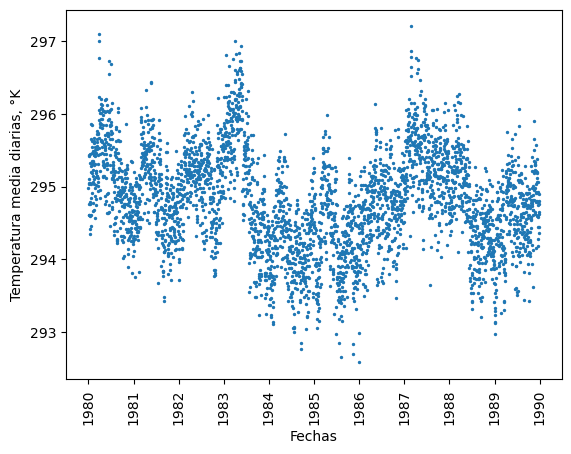

In [39]:
#Gráfico de disperión

plt.scatter(df_temp["Fecha"],df_temp["Temperatura"], s=2)
plt.xlabel("Fechas")
plt.ylabel("Temperatura media diarias, °K")
plt.xticks(rotation=90)
plt.show()

# Obtener dato de El Niño 3.4 SST

In [40]:
#Datos ENOS 3.4

#https://psl.noaa.gov/enso/dashboard.html

In [41]:
enos34 = pd.read_excel("SST34.xlsx")

In [42]:
enos34=enos34.set_index("yyyy")

In [43]:
enos34 = enos34.melt(ignore_index=False).reset_index()

In [44]:
enos34

,yyyy,variable,value
0,1950,Enero,-199
1,1951,Enero,-130
2,1952,Enero,13
3,1953,Enero,20
4,1954,Enero,43
...,...,...,...
895,2020,Diciembre,-115
896,2021,Diciembre,-106
897,2022,Diciembre,-85
898,2023,Diciembre,203


In [45]:
enos34.rename(columns={'yyyy': 'anio', 'variable': 'mes', 'value':'sst'}, inplace=True)

In [46]:
enos34

,anio,mes,sst
0,1950,Enero,-199
1,1951,Enero,-130
2,1952,Enero,13
3,1953,Enero,20
4,1954,Enero,43
...,...,...,...
895,2020,Diciembre,-115
896,2021,Diciembre,-106
897,2022,Diciembre,-85
898,2023,Diciembre,203


# Comparar

In [47]:
Temp_mensuales = df_temp.groupby(df_temp['Fecha'].dt.strftime('%Y-%m')).mean()

In [48]:
Temp_mensuales

,Temperatura
Fecha,
1980-01,295.072175
1980-02,295.226297
1980-03,295.589759
1980-04,295.691346
1980-05,295.509749
...,...
1989-08,294.560664
1989-09,294.532848
1989-10,294.568777


In [49]:
Temp_mensuales_ni = Temp_mensuales.reset_index()

In [50]:
Temp_mensuales_ni

,Fecha,Temperatura
0,1980-01,295.072175
1,1980-02,295.226297
2,1980-03,295.589759
3,1980-04,295.691346
4,1980-05,295.509749
...,...,...
115,1989-08,294.560664
116,1989-09,294.532848
117,1989-10,294.568777
118,1989-11,294.913487


In [51]:
Temp_mes_norm = (Temp_mensuales_ni["Temperatura"]-Temp_mensuales_ni["Temperatura"].mean())/Temp_mensuales_ni["Temperatura"].std()

In [52]:
Temp_mes_norm

0      0.493050
1      0.780945
2      1.459882
3      1.649645
4      1.310425
         ...   
115   -0.462439
116   -0.514399
117   -0.447285
118    0.196625
119   -0.014664
Name: Temperatura, Length: 120, dtype: float64

In [53]:
enos34_filtro = enos34[enos34["anio"].isin(range(1980,1990))]

In [54]:
enos34_filtro

,anio,mes,sst
30,1980,Enero,54
31,1981,Enero,-36
32,1982,Enero,13
33,1983,Enero,235
34,1984,Enero,-67
...,...,...,...
860,1985,Diciembre,-41
861,1986,Diciembre,112
862,1987,Diciembre,94
863,1988,Diciembre,-196


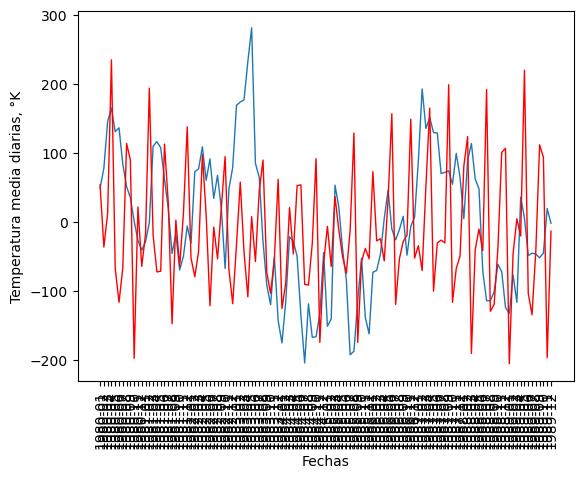

In [55]:
plt.plot(Temp_mensuales_ni["Fecha"],Temp_mes_norm*100, linewidth=1)
plt.plot(Temp_mensuales_ni["Fecha"],enos34_filtro["sst"], c="r",linewidth=1)
plt.xlabel("Fechas")
plt.ylabel("Temperatura media diarias, °K")
plt.xticks(rotation=90)
plt.show()

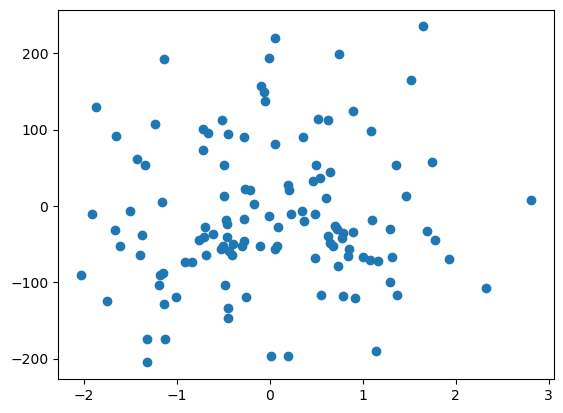

In [56]:
plt.scatter(Temp_mes_norm,enos34_filtro["sst"])

In [57]:
#https://ve.scielo.org/scielo.php?script=sci_arttext&pid=S1012-70892014000100005#fig5

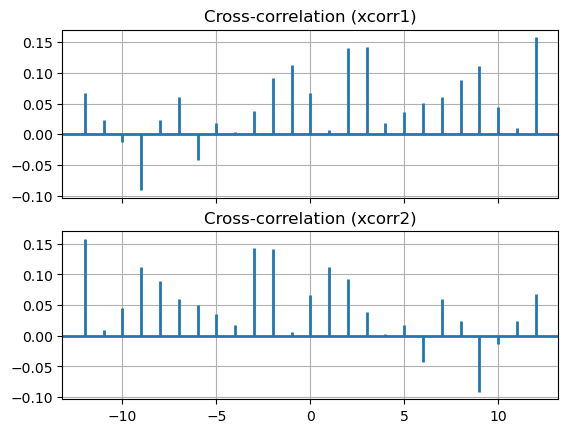

In [58]:
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True)
ax1.xcorr(Temp_mes_norm*100, enos34_filtro["sst"], usevlines=True, maxlags=12, normed=True, lw=2)
ax1.grid(True)
ax1.set_title('Cross-correlation (xcorr1)')

ax2.xcorr(enos34_filtro["sst"], Temp_mes_norm*100, usevlines=True, maxlags=12, normed=True, lw=2)
ax2.grid(True)
ax2.set_title('Cross-correlation (xcorr2)')

plt.show()

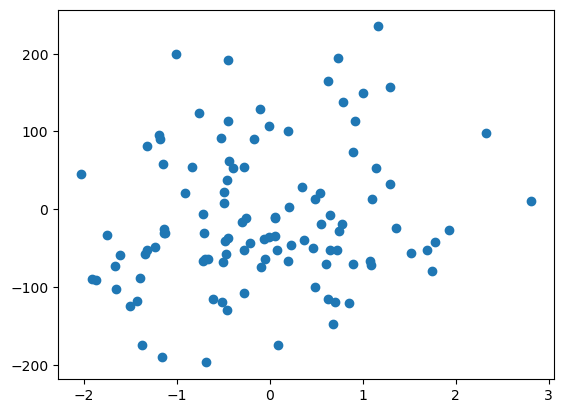

In [59]:
plt.scatter(Temp_mes_norm[12:],enos34_filtro["sst"][:108])

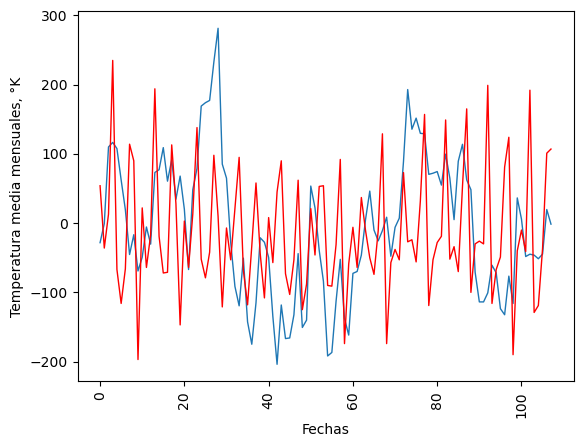

In [60]:
plt.plot(range(108),Temp_mes_norm[12:]*100, linewidth=1)
plt.plot(range(108),enos34_filtro["sst"][:108], c="r",linewidth=1)
plt.xlabel("Fechas")
plt.ylabel("Temperatura media mensuales, °K")
plt.xticks(rotation=90)
plt.show()

In [61]:
pearson = np.corrcoef(Temp_mes_norm[12:],enos34_filtro["sst"][:108])

In [62]:
pearson

array([[1.        , 0.17381921],
       [0.17381921, 1.        ]])

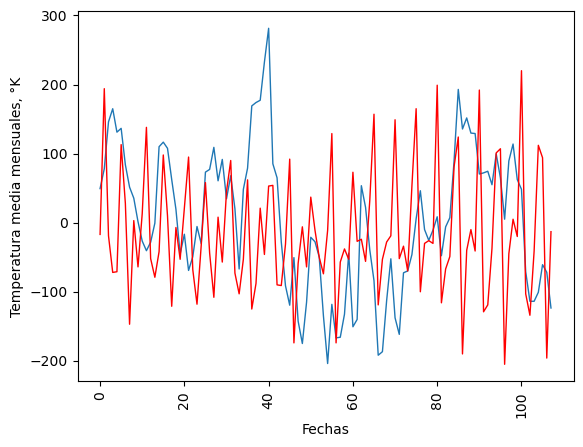

In [63]:
plt.plot(range(108),Temp_mes_norm[:108]*100, linewidth=1)
plt.plot(range(108),enos34_filtro["sst"][12:], c="r",linewidth=1)
plt.xlabel("Fechas")
plt.ylabel("Temperatura media mensuales, °K")
plt.xticks(rotation=90)
plt.show()

In [64]:
pearson = np.corrcoef(Temp_mes_norm[:108]*100, enos34_filtro["sst"][12:])

In [65]:
pearson

array([[1.        , 0.08328319],
       [0.08328319, 1.        ]])

# Crea el modelo de regresión